<a href="https://colab.research.google.com/github/Thamarai-Selvam/WhatsThere/blob/master/whatsreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

starting
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/WhatsApp Chat with Coimbatore Anime Club!!.txt got file !


author value counts...

+91 94894 87062    1012
+91 86677 40424     659
+91 78299 02612     410
+91 80723 19041     302
+91 86670 44762     209
                   ... 
+91 80722 93251       1
+91 95665 36196       1
+91 98655 12031       1
+91 86674 32822       1
+91 88070 77005       1
Name: Author, Length: 65, dtype: int64
null_authors....

media count
Empty DataFrame
Columns: [Date, Time, Author, Message]
Index: []


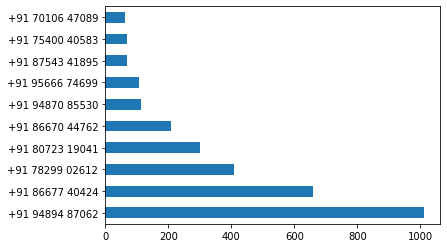

In [70]:
# -*- coding: utf-8 -*-
"""whatsreport.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ROIwZr_mqCqBAYbpyeL05DYfe0mrpHlD
"""

import re
import pandas as pd
from google.colab import drive

def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), (([0-9][0-9]):([0-9][0-9]) (pm)) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False



def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message


print('starting')

drive.mount('/content/drive')
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/drive/My Drive/Colab Notebooks/WhatsApp Chat with Coimbatore Anime Club!!.txt' 
print(conversationPath+' got file !\n\n')
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    while True:
        line = fp.readline() 
       # print(line)
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip('') # Guarding against erroneous leading and trailing whitespaces
        if startsWithDate(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer



df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
print('author value counts...\n')
author_value_counts = df['Author'].value_counts() # Number of messages per author
print(+author_value_counts)
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot a bar chart using pandas built-in plotting apis
print('null_authors....\n')
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()
print('media count')
for message in df['Message']:
  if(message ==  '<Media omitted>'):
    print('x'+message)

media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())


df.to_csv('data.csv',index=False)

!cp data.csv /content/drive/My\ Drive/Colab\ Notebooks/
#author_media_messages_value_counts = media_messages_df['Author'].value_counts()
#top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
#top_10_author_media_messages_value_counts.plot.barh()

